# Ice Extent over years

## 1979 to 2023

We removed the data for 1978 as there was only two months of data and that is not representative of the whole year

In [141]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import watermark
sns.set_theme()


### Arctic

In [185]:
# Importing the data in csv format, and it is take from (The National Snow and Ice Data Center (NSIDC) at the University of Colorado Boulder (CU Boulder))
n_seaice = pd.read_csv('Datasets/N_seaice_extent_daily_v3.0.csv', header=0)
n_seaice.tail(10)

,Year,Month,Day,Extent,Missing,Source Data
14895,2024,02,12,14.626,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.02.11/NSIDC0...
14896,2024,02,13,14.608,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.02.12/NSIDC0...
14897,2024,02,14,14.624,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.02.13/NSIDC0...
14898,2024,02,15,14.607,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.02.14/NSIDC0...
14899,2024,02,16,14.588,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.02.15/NSIDC0...
14900,2024,02,17,14.646,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.02.16/NSIDC0...
14901,2024,02,18,14.676,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.02.17/NSIDC0...
14902,2024,02,19,14.776,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.02.18/NSIDC0...
14903,2024,02,20,14.846,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.02.19/NSIDC0...
14904,2024,02,21,14.843,0.000,['/ecs/DP4/PM/NSIDC-0081.002/2024.02.20/NSIDC0...


In [186]:
# Name of the columns
n_seaice.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

In [144]:
# Dropping the 
n_seaice_clean =(n_seaice
                 .drop([' Source Data'], axis=1)
                 .drop([0], axis=0)
                 )
n_seaice_clean.head()

,Year,Month,Day,Extent,Missing
1,1978,10,26,10.231,0.000
2,1978,10,28,10.420,0.000
3,1978,10,30,10.557,0.000
4,1978,11,01,10.670,0.000
5,1978,11,03,10.777,0.000


In [145]:
n_seaice_clean.shape

(14904, 5)

In [146]:
n_seaice_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14904 entries, 1 to 14904
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Year         14904 non-null  object
 1    Month       14904 non-null  object
 2    Day         14904 non-null  object
 3        Extent  14904 non-null  object
 4       Missing  14904 non-null  object
dtypes: object(5)
memory usage: 582.3+ KB


In [147]:
# Change the Year, Month, Day, Missing and Extent columns to integers
n_seaice_clean['Year'] = n_seaice_clean['Year'].astype(int)
n_seaice_clean['Month'] = n_seaice_clean[' Month'].astype(int)
n_seaice_clean['Day'] = n_seaice_clean[' Day'].astype(int)
n_seaice_clean['Extent'] = n_seaice_clean['     Extent'].astype(float)
n_seaice_clean['Missing'] = n_seaice_clean['    Missing'].astype(float)
n_seaice_clean =(n_seaice_clean
                 .drop([' Month'], axis=1)
                 .drop([' Day'], axis=1)
                 .drop(['     Extent'], axis=1)
                 .drop(['    Missing'], axis=1)
                 )
n_seaice_clean['Date'] = pd.to_datetime(n_seaice_clean[['Year', 'Month', 'Day']])
n_seaice_clean.head()

,Year,Month,Day,Extent,Missing,Date
1,1978,10,26,10.231,0.0,1978-10-26
2,1978,10,28,10.420,0.0,1978-10-28
3,1978,10,30,10.557,0.0,1978-10-30
4,1978,11,1,10.670,0.0,1978-11-01
5,1978,11,3,10.777,0.0,1978-11-03


In [148]:
n_seaice_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14904 entries, 1 to 14904
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     14904 non-null  int64         
 1   Month    14904 non-null  int64         
 2   Day      14904 non-null  int64         
 3   Extent   14904 non-null  float64       
 4   Missing  14904 non-null  float64       
 5   Date     14904 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 698.8 KB


In [149]:
n_seaice_clean.describe()

,Year,Month,Day,Extent,Missing,Date
count,14904.000000,14904.000000,14904.000000,14904.000000,14904.0,14904
mean,2002.987386,6.526973,15.734165,11.233324,0.0,2003-06-27 18:26:16.811594240
min,1978.000000,1.000000,1.000000,3.340000,0.0,1978-10-26 00:00:00
25%,1993.000000,4.000000,8.000000,8.474750,0.0,1993-07-15 18:00:00
50%,2003.000000,7.000000,16.000000,11.969000,0.0,2003-09-27 12:00:00
75%,2013.000000,10.000000,23.000000,14.159000,0.0,2013-12-09 06:00:00
max,2024.000000,12.000000,31.000000,16.635000,0.0,2024-02-21 00:00:00
std,12.206453,3.455385,8.800818,3.316958,0.0,NaN


In [150]:
n_seaice_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14904 entries, 1 to 14904
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Year     14904 non-null  int64         
 1   Month    14904 non-null  int64         
 2   Day      14904 non-null  int64         
 3   Extent   14904 non-null  float64       
 4   Missing  14904 non-null  float64       
 5   Date     14904 non-null  datetime64[ns]
dtypes: datetime64[ns](1), float64(2), int64(3)
memory usage: 698.8 KB


In [151]:
n_seaice_grouped = n_seaice_clean.groupby(['Year']).mean()
n_seaice_grouped.tail()

,Month,Day,Extent,Missing,Date
Year,,,,,
2020,6.513661,15.756831,10.149869,0.0,2020-07-01 12:00:00.000000000
2021,6.526027,15.720548,10.551784,0.0,2021-07-02 00:00:00.000000000
2022,6.526027,15.720548,10.661425,0.0,2022-07-01 23:59:59.999999744
2023,6.526027,15.720548,10.469770,0.0,2023-07-02 00:00:00.000000000
2024,1.403846,13.980769,14.160173,0.0,2024-01-26 12:00:00.000000000


In [152]:
# remove last row
n_seaice_grouped = n_seaice_grouped[:-1]

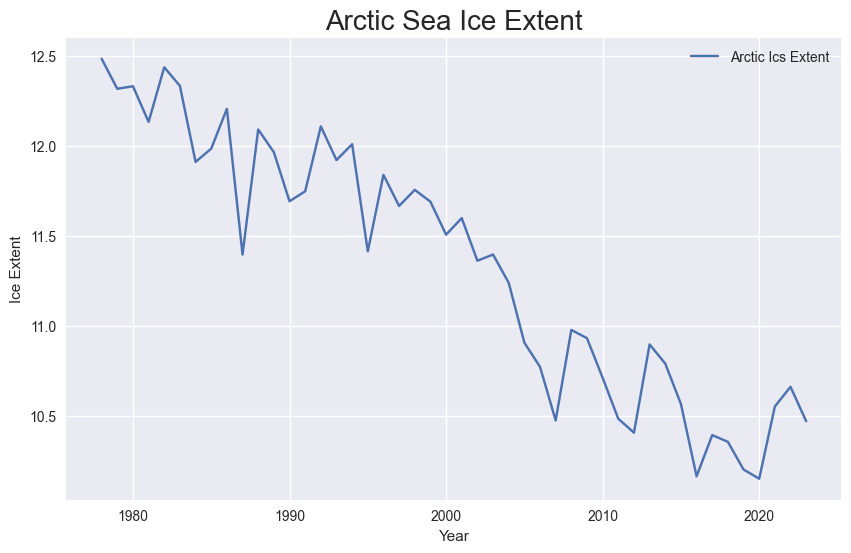

In [153]:
# plot the rolling mean of the sea ice extent

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Arctic Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()


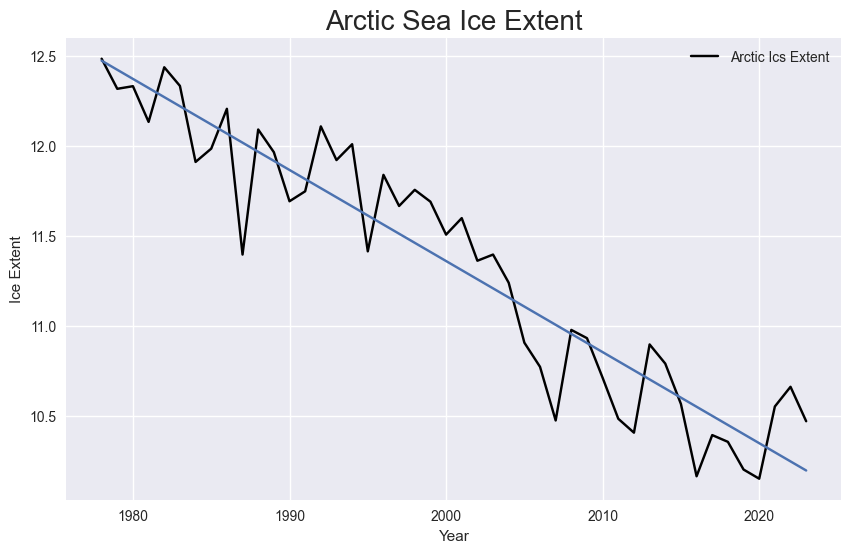

In [154]:
# Add regression line

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10, 6))
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent', color='black')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Arctic Sea Ice Extent', fontsize=20)
plt.legend()

# Add regression line
z = np.polyfit(n_seaice_grouped.index, n_seaice_grouped['Extent'], 1)
p = np.poly1d(z)
plt.plot(n_seaice_grouped.index, p(n_seaice_grouped.index), "b-")
plt.show()


### Antarctic

In [155]:
s_seaice = pd.read_csv ('Datasets/S_seaice_extent_daily_v3.0.csv', header=0)

s_seaice.head()

,Year,Month,Day,Extent,Missing,Source Data
0,YYYY,MM,DD,10^6 sq km,10^6 sq km,Source data product web sites: http://nsidc.o...
1,1978,10,26,17.624,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.26/nt_19...
2,1978,10,28,17.803,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.28/nt_19...
3,1978,10,30,17.670,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.10.30/nt_19...
4,1978,11,01,17.527,0.000,['/ecs/DP1/PM/NSIDC-0051.001/1978.11.01/nt_19...


In [156]:
s_seaice.columns

Index(['Year', ' Month', ' Day', '     Extent', '    Missing', ' Source Data'], dtype='object')

In [157]:
s_seaice_clean = (s_seaice
                  .drop([' Source Data'], axis =1)
                  .drop([0], axis=0))
s_seaice_clean.head()

,Year,Month,Day,Extent,Missing
1,1978,10,26,17.624,0.000
2,1978,10,28,17.803,0.000
3,1978,10,30,17.670,0.000
4,1978,11,01,17.527,0.000
5,1978,11,03,17.486,0.000


In [158]:
s_seaice_clean.shape

(14904, 5)

In [159]:
s_seaice_clean.dtypes

Year           object
 Month         object
 Day           object
     Extent    object
    Missing    object
dtype: object

In [160]:
year_mean = s_seaice_clean['Year']
year_mean

1        1978
2        1978
3        1978
4        1978
5        1978
         ... 
14900    2024
14901    2024
14902    2024
14903    2024
14904    2024
Name: Year, Length: 14904, dtype: object

In [161]:
s_seaice_clean['Year'] = pd.to_datetime(s_seaice_clean['Year'], format='%Y')

# Now 'Year' column has been converted to datetime format
year_mean = s_seaice_clean['Year']

In [162]:
year_mean

1       1978-01-01
2       1978-01-01
3       1978-01-01
4       1978-01-01
5       1978-01-01
           ...    
14900   2024-01-01
14901   2024-01-01
14902   2024-01-01
14903   2024-01-01
14904   2024-01-01
Name: Year, Length: 14904, dtype: datetime64[ns]

In [163]:
s_seaice_clean['Year'] = s_seaice_clean['Year'].dt.year
year_mean = s_seaice_clean['Year']
year_mean

1        1978
2        1978
3        1978
4        1978
5        1978
         ... 
14900    2024
14901    2024
14902    2024
14903    2024
14904    2024
Name: Year, Length: 14904, dtype: int32

In [164]:
# Change the Year, Month and Day columns to integers
s_seaice_clean['Year'] = s_seaice_clean['Year'].astype(int)
s_seaice_clean['Month'] = s_seaice_clean[' Month'].astype(int)
s_seaice_clean['Day'] = s_seaice_clean[' Day'].astype(int)
s_seaice_clean['Extent'] = s_seaice_clean['     Extent'].astype(float)
s_seaice_clean['Missing'] = s_seaice_clean['    Missing'].astype(float)
s_seaice_clean =(s_seaice_clean
                 .drop([' Month'], axis=1)
                 .drop([' Day'], axis=1)
                 .drop(['     Extent'], axis=1)
                 .drop(['    Missing'], axis=1))
s_seaice_clean['Date'] = pd.to_datetime(s_seaice_clean[['Year', 'Month', 'Day']])
s_seaice_clean.head()

,Year,Month,Day,Extent,Missing,Date
1,1978,10,26,17.624,0.0,1978-10-26
2,1978,10,28,17.803,0.0,1978-10-28
3,1978,10,30,17.670,0.0,1978-10-30
4,1978,11,1,17.527,0.0,1978-11-01
5,1978,11,3,17.486,0.0,1978-11-03


In [165]:
s_seaice_grouped = s_seaice_clean.groupby(['Year']).mean()
s_seaice_grouped.tail()

# plot 

,Month,Day,Extent,Missing,Date
Year,,,,,
2020,6.513661,15.756831,11.602402,0.000000,2020-07-01 12:00:00.000000000
2021,6.526027,15.720548,11.578682,0.000000,2021-07-02 00:00:00.000000000
2022,6.526027,15.720548,10.726003,0.000000,2022-07-01 23:59:59.999999744
2023,6.526027,15.720548,9.852699,0.000164,2023-07-02 00:00:00.000000000
2024,1.403846,13.980769,3.222038,0.004558,2024-01-26 12:00:00.000000000


In [173]:
# remove last row

s_seaice_grouped = s_seaice_grouped[:-1]

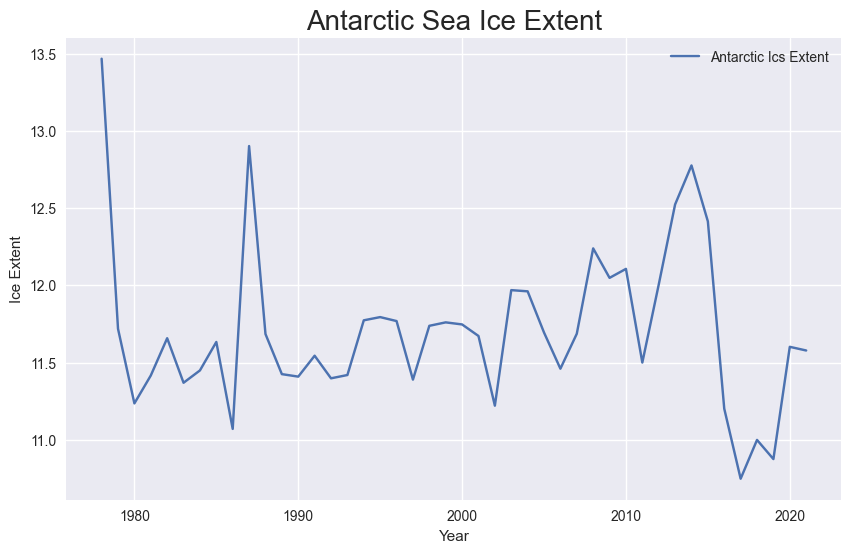

In [174]:
# plot the rolling mean of the sea ice extent

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Antarctic Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()

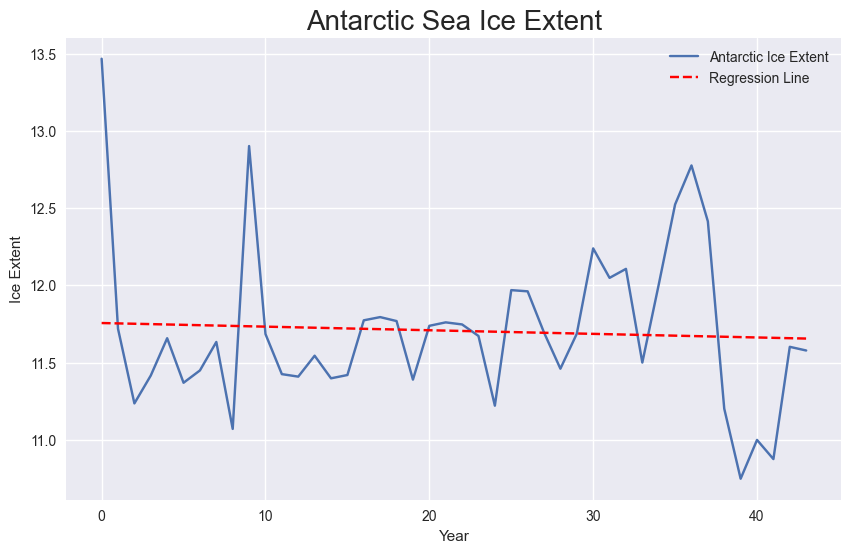

In [175]:
# Fit a linear regression line
x = np.arange(len(s_seaice_grouped['Extent']))
y = s_seaice_grouped['Extent']
coefficients = np.polyfit(x, y, 1)
poly_line = np.poly1d(coefficients)

# Plotting
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(x, y, label='Antarctic Ice Extent')
plt.plot(x, poly_line(x), label='Regression Line', color='red', linestyle='--')  # Plot regression line
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Antarctic Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()


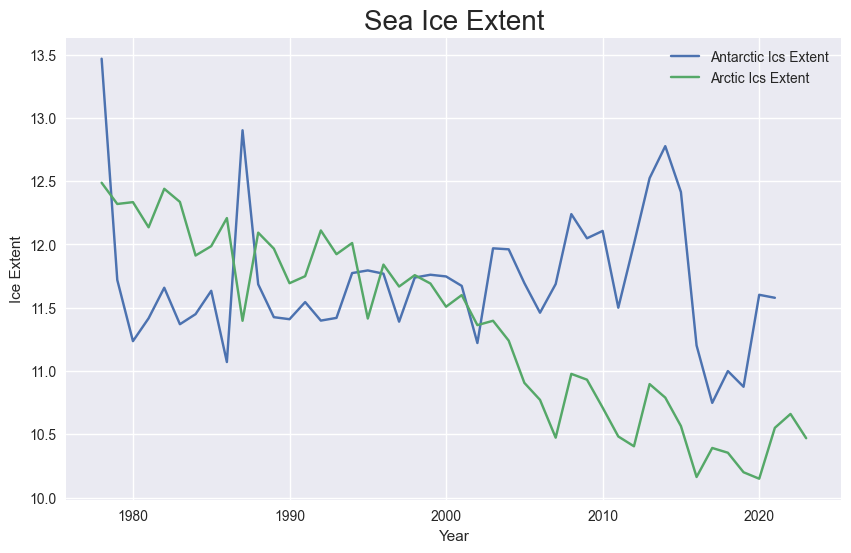

In [176]:
# plot the arctic and antarctic ice extent in one plot

# plot the data
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))
plt.plot(s_seaice_grouped['Extent'], label='Antarctic Ics Extent')
plt.plot(n_seaice_grouped['Extent'], label='Arctic Ics Extent')
plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()


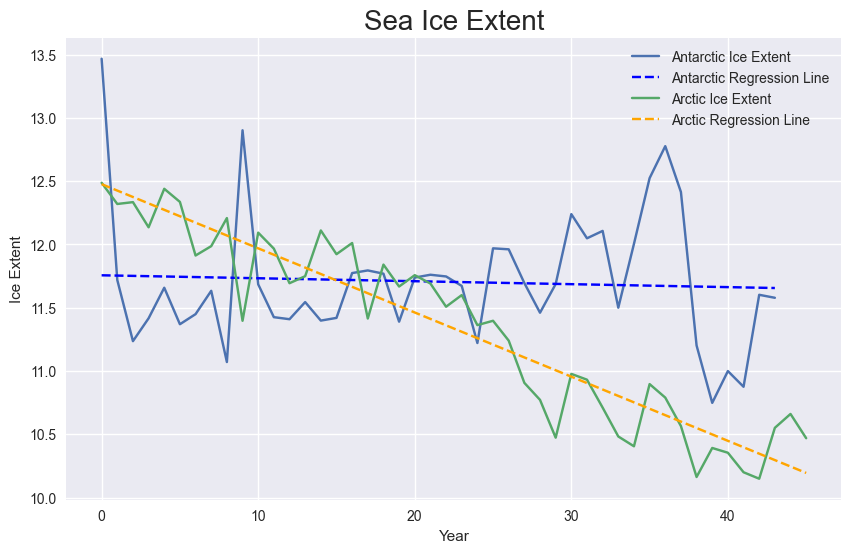

In [177]:
# Fit a linear regression line for Antarctic ice extent
x_antarctic = np.arange(len(s_seaice_grouped['Extent']))
y_antarctic = s_seaice_grouped['Extent']
coefficients_antarctic = np.polyfit(x_antarctic, y_antarctic, 1)
poly_line_antarctic = np.poly1d(coefficients_antarctic)

# Fit a linear regression line for Arctic ice extent
x_arctic = np.arange(len(n_seaice_grouped['Extent']))
y_arctic = n_seaice_grouped['Extent']
coefficients_arctic = np.polyfit(x_arctic, y_arctic, 1)
poly_line_arctic = np.poly1d(coefficients_arctic)

# Plotting
plt.style.use('seaborn-v0_8')
plt.figure(figsize=(10,6))

# Plot Antarctic sea ice extent and regression line
plt.plot(x_antarctic, y_antarctic, label='Antarctic Ice Extent')
plt.plot(x_antarctic, poly_line_antarctic(x_antarctic), label='Antarctic Regression Line', color='blue', linestyle='--')

# Plot Arctic sea ice extent and regression line
plt.plot(x_arctic, y_arctic, label='Arctic Ice Extent')
plt.plot(x_arctic, poly_line_arctic(x_arctic), label='Arctic Regression Line', color='orange', linestyle='--')

plt.xlabel('Year')
plt.ylabel('Ice Extent')
plt.title('Sea Ice Extent', fontsize=20)
plt.legend()
plt.show()
